# Student Performance Indicator

## Life cycle of Machine learning Project

Understanding the Problem Statement
Data Collection

Data Checks to perform

Exploratory data analysis

Data Pre-Processing

Model Training

Choose best model

## Problem Statement

This project understands how the student performance(test scores) is affected by other variables such as Gender, Ethnicity, Parental Level Of Education, Lunch & Test Preparation Course.

## Data Collection
Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977

The data consists of 8 column and 1000 rows.

### Import Data & Packages


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Import CSV File

In [2]:
df = pd.read_csv('data/StudentsPerformance.csv')

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### Dataset information

gender : sex of students -> (Male/female)

race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)

parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)

lunch : having lunch before test (standard or free/reduced)

test preparation course : complete or not complete before test

math score

reading score

writing score

### Data Checks to perform
Check Missing values

Check Duplicates

Check data type

Check the number of unique values of each column

Check statistics of data set

Check various categories present in the different categorical column

#### 1 Checking Missing Values

In [5]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

#### 2 Check Duplicates

In [6]:
df.duplicated().sum()

np.int64(0)

No Duplicates in this Dataset

#### 3 Check Datatype

In [7]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

#### 4 Checking Number Of Missing Values In Each Datatype

In [8]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

#### 5 Check Statistics Of Dataset

In [9]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


##### Observations

We've got statistics for integer datatypes, Math Score, Reading Score & Writing Score

In which mean is nearly same of all three scores

Standard deviations are ranging between 14 to 16

#### 6 Checking Various Categories Present In Different Categorical Column

In [10]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [11]:
print("Categories In Gender Variable: ", df['gender'].unique())
print("Categories In Race Ethnicity Variable: ", df['race/ethnicity'].unique())
print("Categories In Parental Level Of Education Variable: ", df['parental level of education'].unique())
print("Categories In Lunch Variable: ", df['lunch'].unique())
print("Categories In Test Preparation Course Variable: ", df['test preparation course'].unique())

Categories In Gender Variable:  ['female' 'male']
Categories In Race Ethnicity Variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories In Parental Level Of Education Variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories In Lunch Variable:  ['standard' 'free/reduced']
Categories In Test Preparation Course Variable:  ['none' 'completed']


In [12]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print("Numerical Features are: ", numeric_features)
print("Categorical Features are: ", categorical_features)


Numerical Features are:  ['math score', 'reading score', 'writing score']
Categorical Features are:  ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


### Adding Columns For Total Score & Average

In [13]:
df['total score'] = df['math score'] + df['reading score'] + df['writing score']
df['average'] = df['total score']/3

df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


### Exploring Data (Visualisation)

#### Histogram & KDE

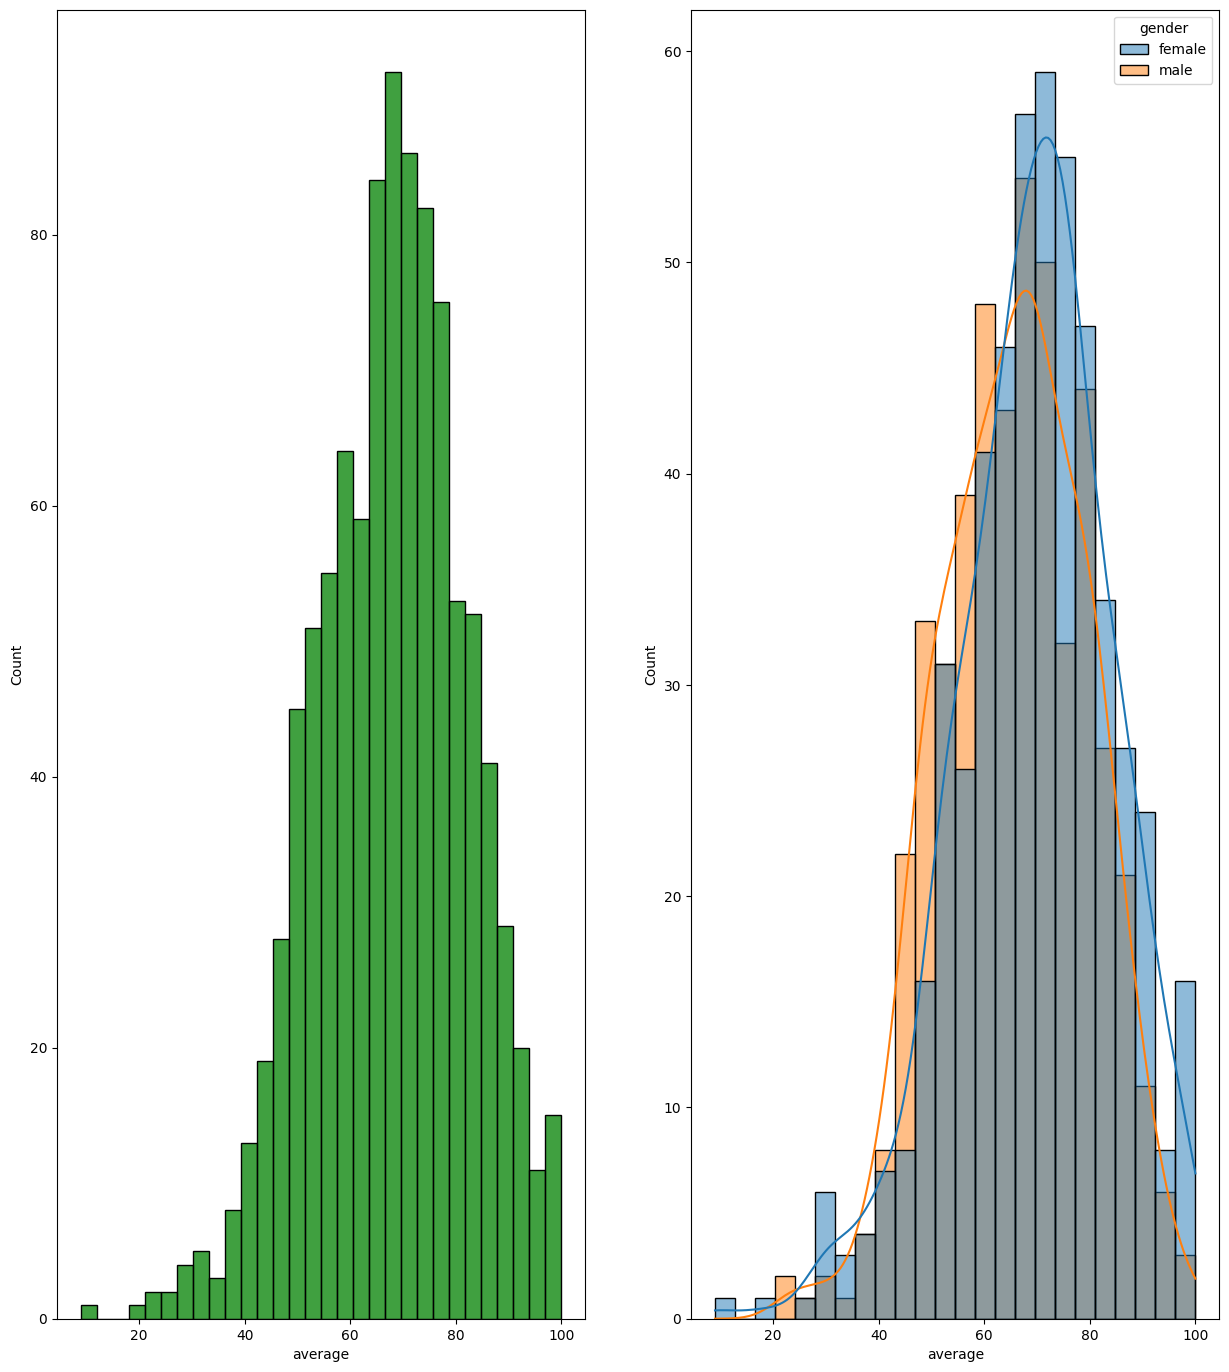

In [14]:
fig, axs = plt.subplots(1, 2, figsize = (15,17))
plt.subplot(121)
sns.histplot(data = df, x = 'average', bins = 30, kde = False, color = 'g')
plt.subplot(122)
sns.histplot(data = df, x = 'average', kde = True, hue = 'gender')
plt.show()

Above observation shows that female gender has higher scores compared to male gender

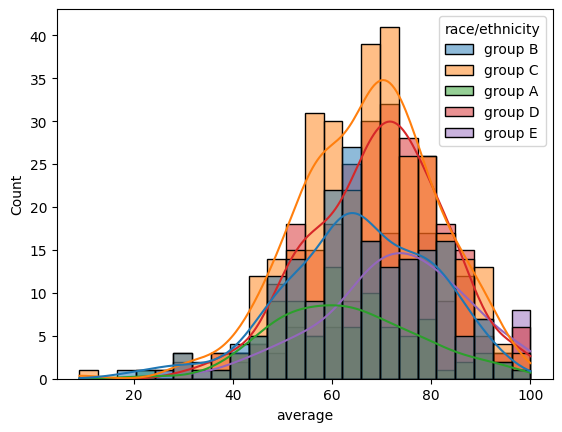

In [15]:
sns.histplot(data = df, x = 'average', kde = True, hue = 'race/ethnicity')
plt.show()

Students of race/ethnicity Group C has highest score followed by Group D, Group B, Group E & Group A.

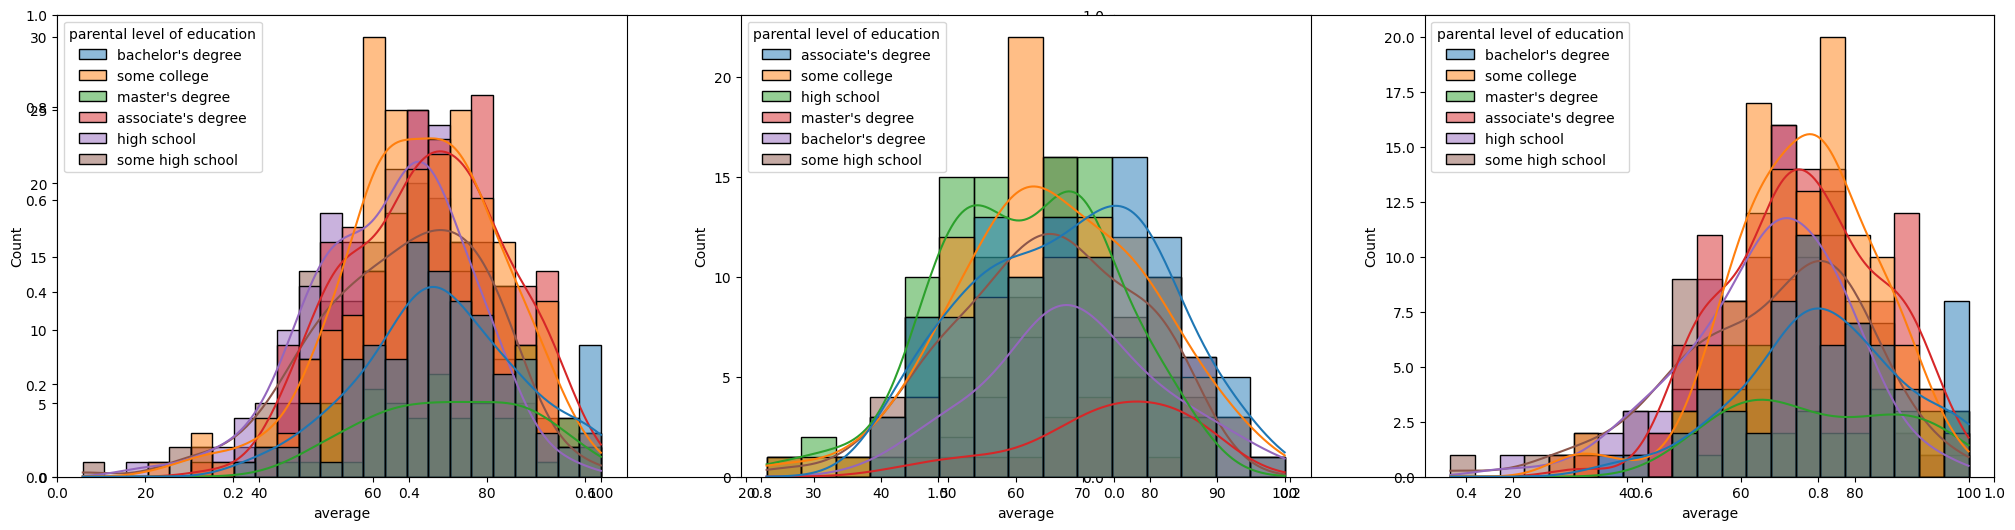

In [16]:
plt.subplots(1, 2, figsize = (25, 6))
plt.subplot(131)
sns.histplot(data = df, x = 'average', kde = True, hue = 'parental level of education')
plt.subplot(132)
sns.histplot(data = df[df.gender == 'male'], x = 'average', kde = True, hue = 'parental level of education')
plt.subplot(133)
sns.histplot(data = df[df.gender == 'female'], x = 'average', kde = True, hue = 'parental level of education')
plt.show()


As Observed, Parental level of education does not affect student performance, also we can say it is inversely proportional.
Students whose parents has done some college are performing best in this dataset, while parents having Masters Degree & Bachelors Degree are below them.

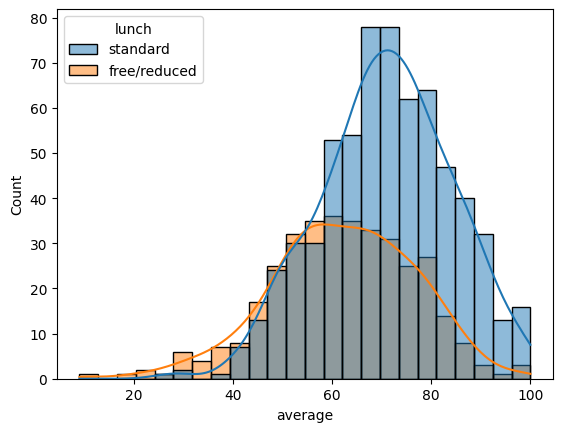

In [17]:
sns.histplot(data = df, x = 'average', kde = True, hue = 'lunch')
plt.show()

Students having standard lunch tend to score more compared to students having free/reduced lunch.

#### Maximum score of students in all three subjects

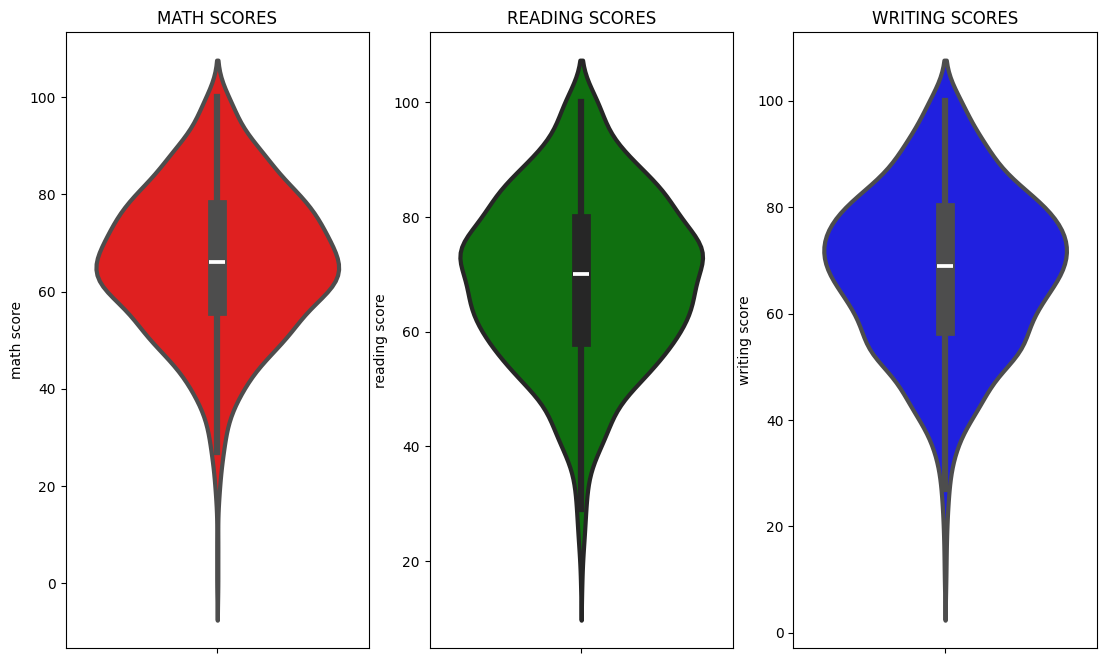

In [18]:
plt.figure(figsize=(18,8))
plt.subplot(1,4,1)
plt.title('MATH SCORES')
sns.violinplot(data = df, y = 'math score', color = 'red', linewidth=3)
plt.subplot(1,4,2)
plt.title('READING SCORES')
sns.violinplot(y = 'reading score', data = df, color = 'green', linewidth = 3)
plt.subplot(1,4,3)
plt.title('WRITING SCORES')
sns.violinplot(data = df, y = 'writing score', color = 'blue', linewidth = 3)
plt.show()

#### Multivariate analysis using pieplot

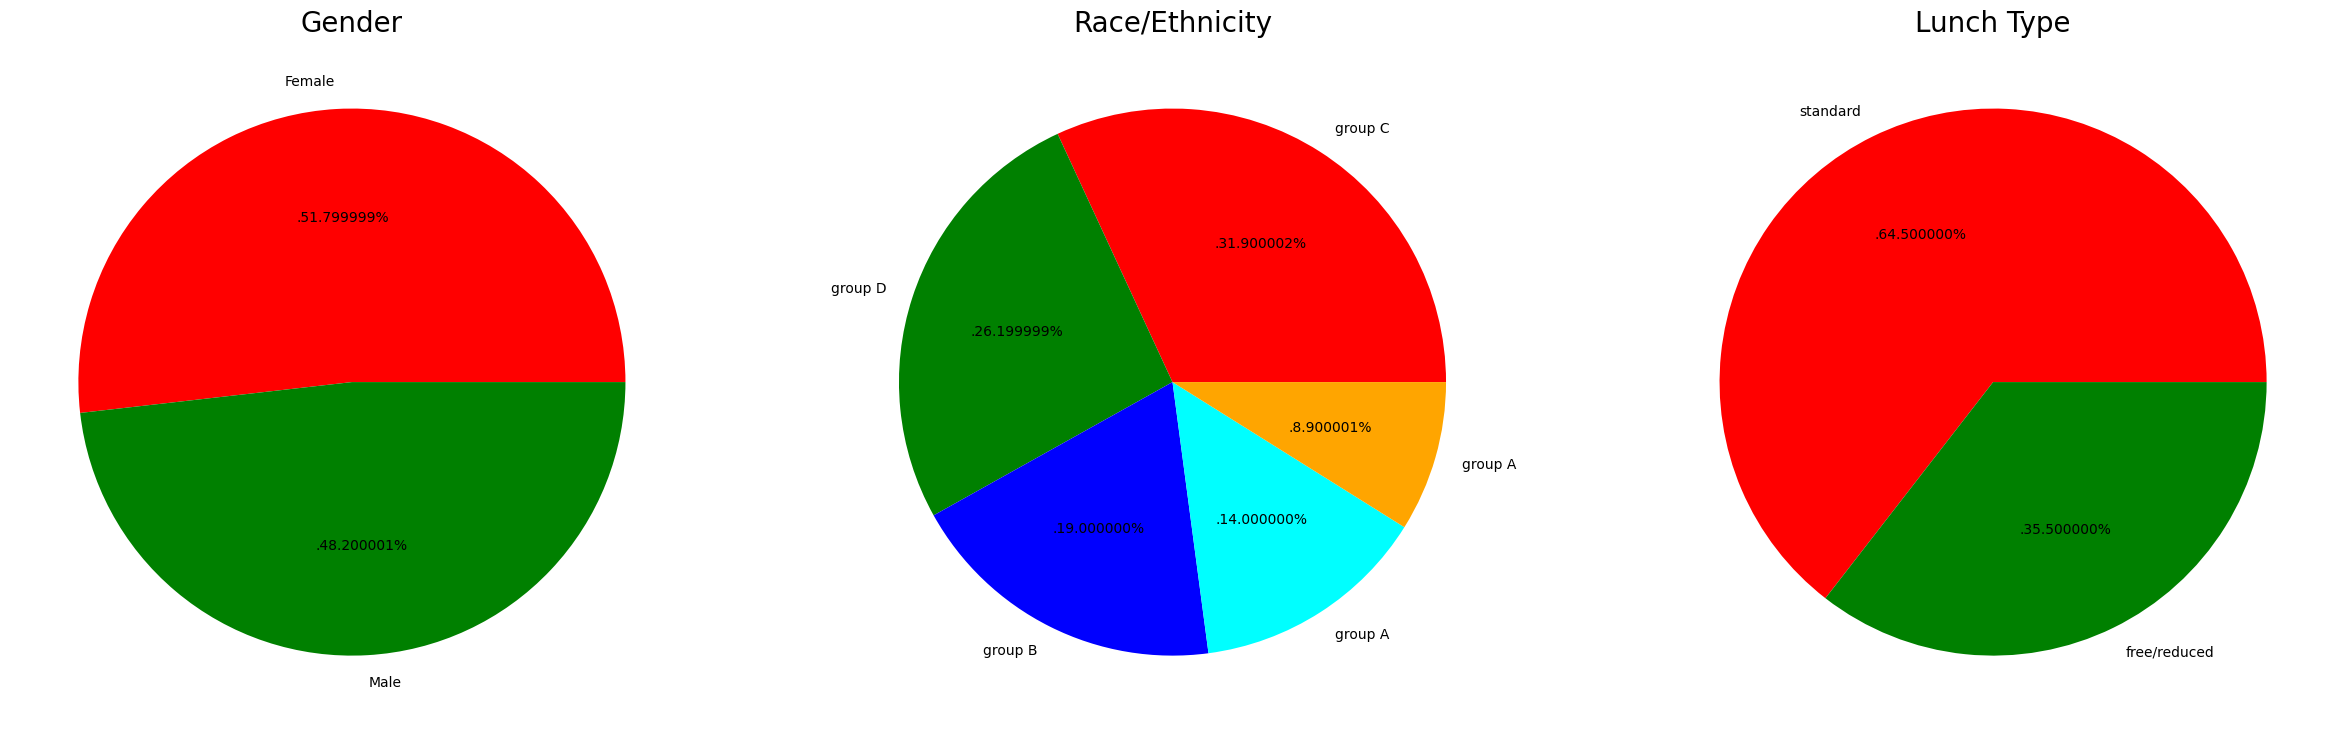

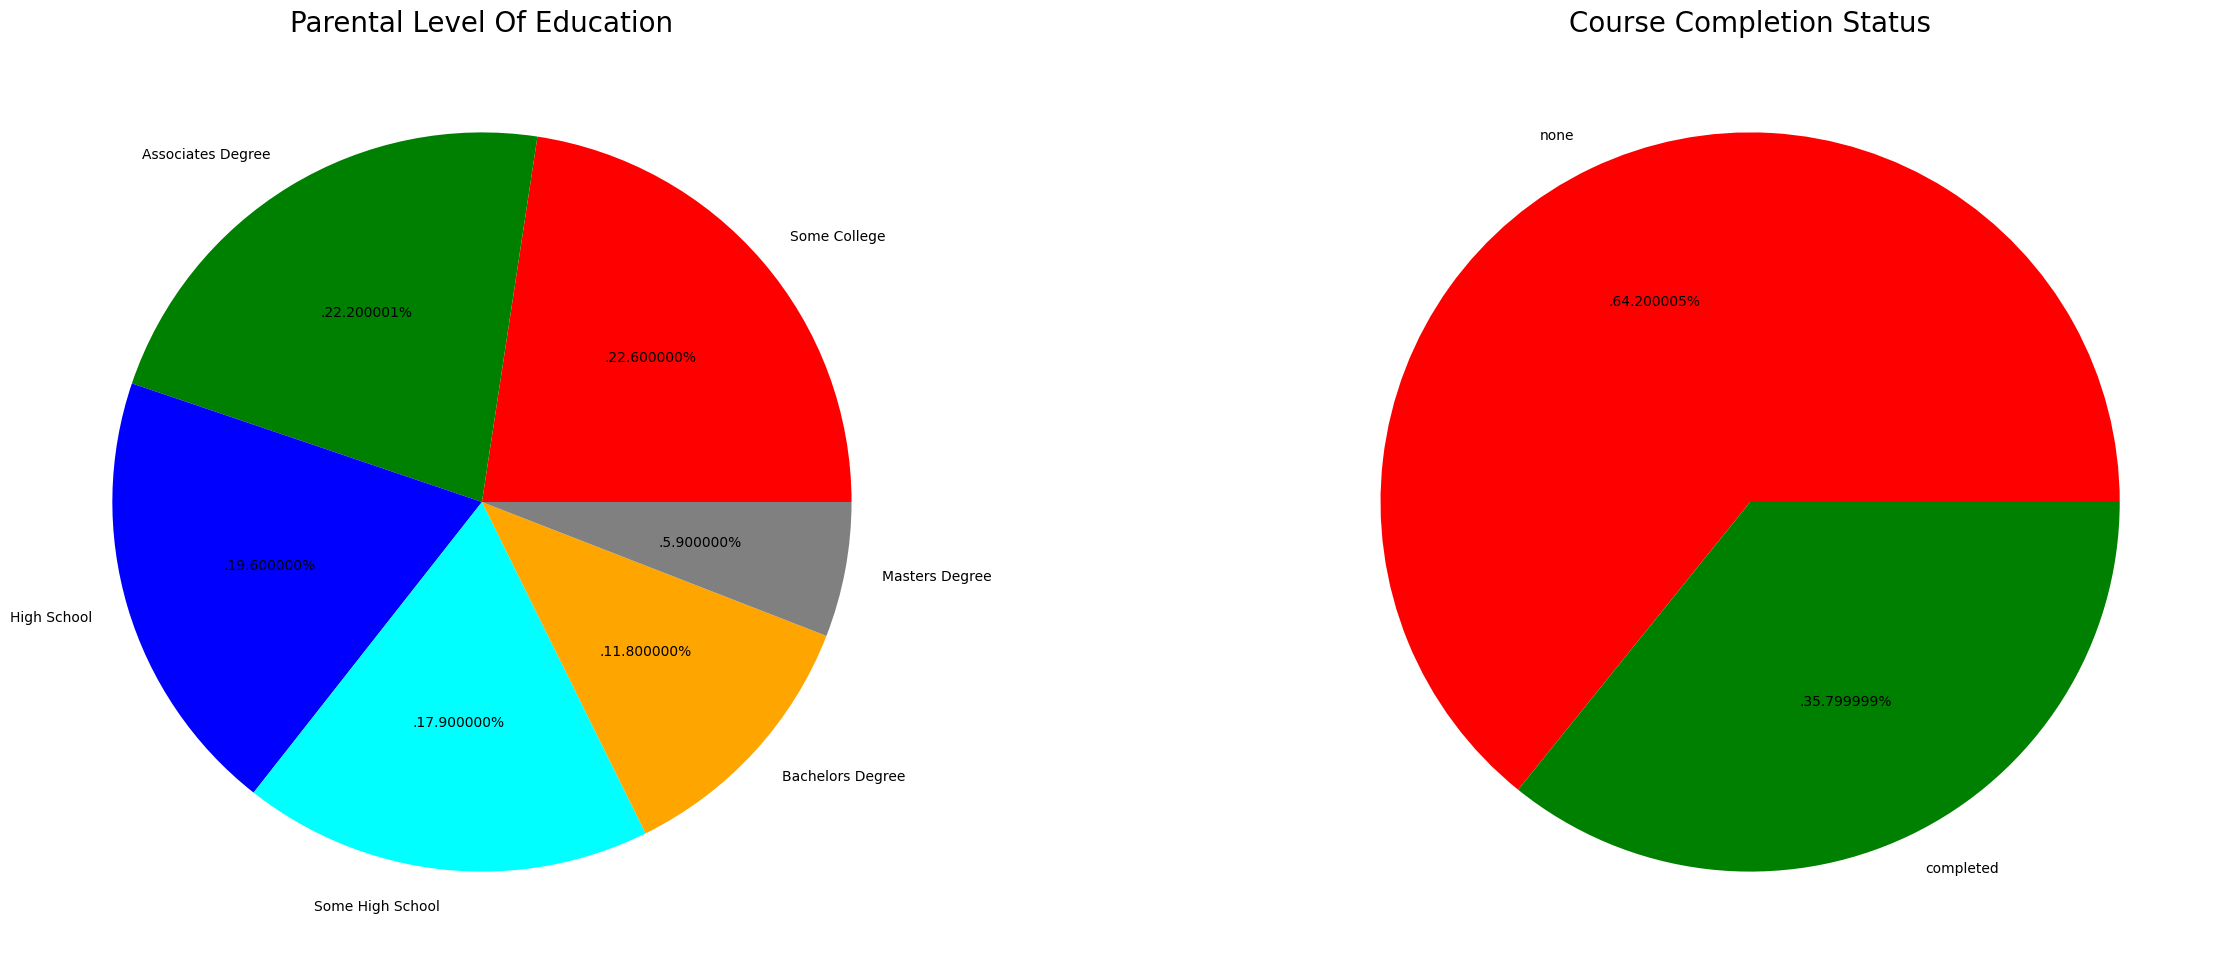

In [19]:
plt.rcParams['figure.figsize'] = (30,12)

plt.subplot(1, 3, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red', 'green']

plt.pie(size, colors = color, labels = labels, autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')

plt.subplot(1, 3, 2)
size = df['race/ethnicity'].value_counts()
labels = 'group C', 'group D', 'group B', 'group A', 'group A'
color = ['red', 'green', 'blue', 'cyan', 'orange']

plt.pie(size, colors = color, labels = labels, autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')

plt.subplot(1, 3, 3)
size = df['lunch'].value_counts()
labels = 'standard', 'free/reduced'
color = ['red', 'green']

plt.pie(size, colors = color, labels = labels, autopct = '.%2f%%')
plt.title('Lunch Type', fontsize = 20)
plt.axis('off')

plt.show()

#plt.rcParams['figure.figsize'] = (30,12)

plt.subplot(1, 2, 1)
size = df['parental level of education'].value_counts()
labels = "Some College", 'Associates Degree', "High School", "Some High School",'Bachelors Degree', 'Masters Degree'
color = ['red', 'green', 'blue', 'cyan', 'orange', 'grey']

plt.pie(size, colors = color, labels = labels, autopct = '.%2f%%')
plt.title('Parental Level Of Education', fontsize = 20)
plt.axis('off')

plt.subplot(1, 2, 2)
size = df['test preparation course'].value_counts()
labels = 'none', 'completed'
color = ['red', 'green']

plt.pie(size, colors = color, labels = labels, autopct = '.%2f%%')
plt.title('Course Completion Status', fontsize = 20)
plt.axis('off')

plt.show()

Number of Male & Female students are equal.

Number of students are highest in Group C followed by Group D, Group B, Group E, Group A.

Number of students having Standard lunch i.e. ~65% are higher compared to free/reduced i.e. ~35%.

Number of students whose parental level of education is 'Some College' is highest, followed closely by 'Associates Degree'.

More Number of students have not enrolled in any test preparation course i.e. ~64%.

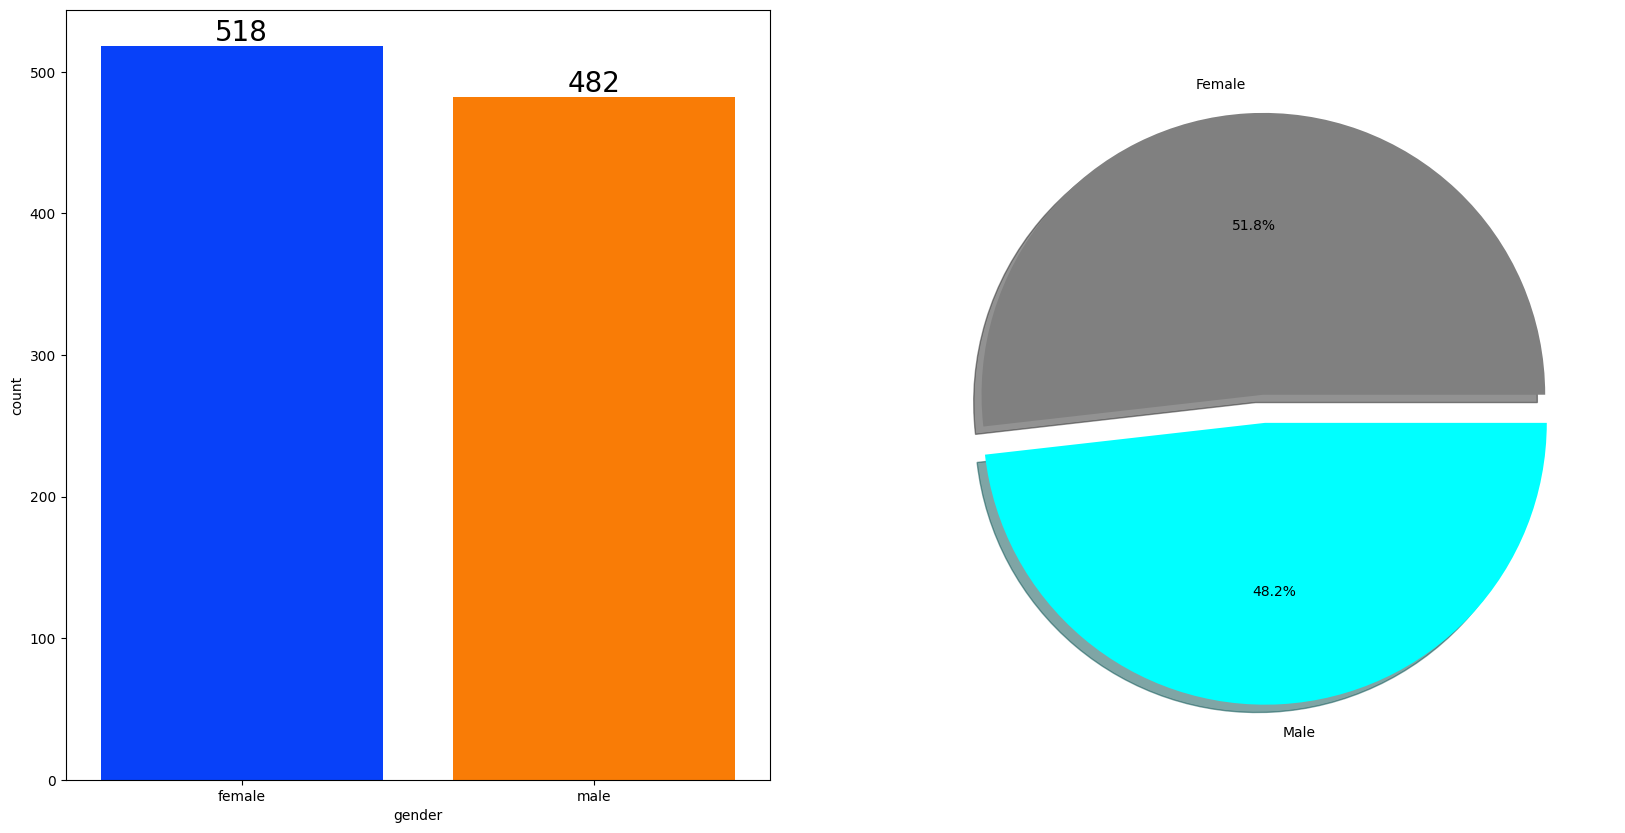

In [20]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(), labels = ['Female', 'Male'], explode=[0,0.1], autopct='%1.1f%%', shadow=True, colors=['grey','cyan'])
plt.show()

Female: 518 (51.8%)

Male: 482 (48.2%)

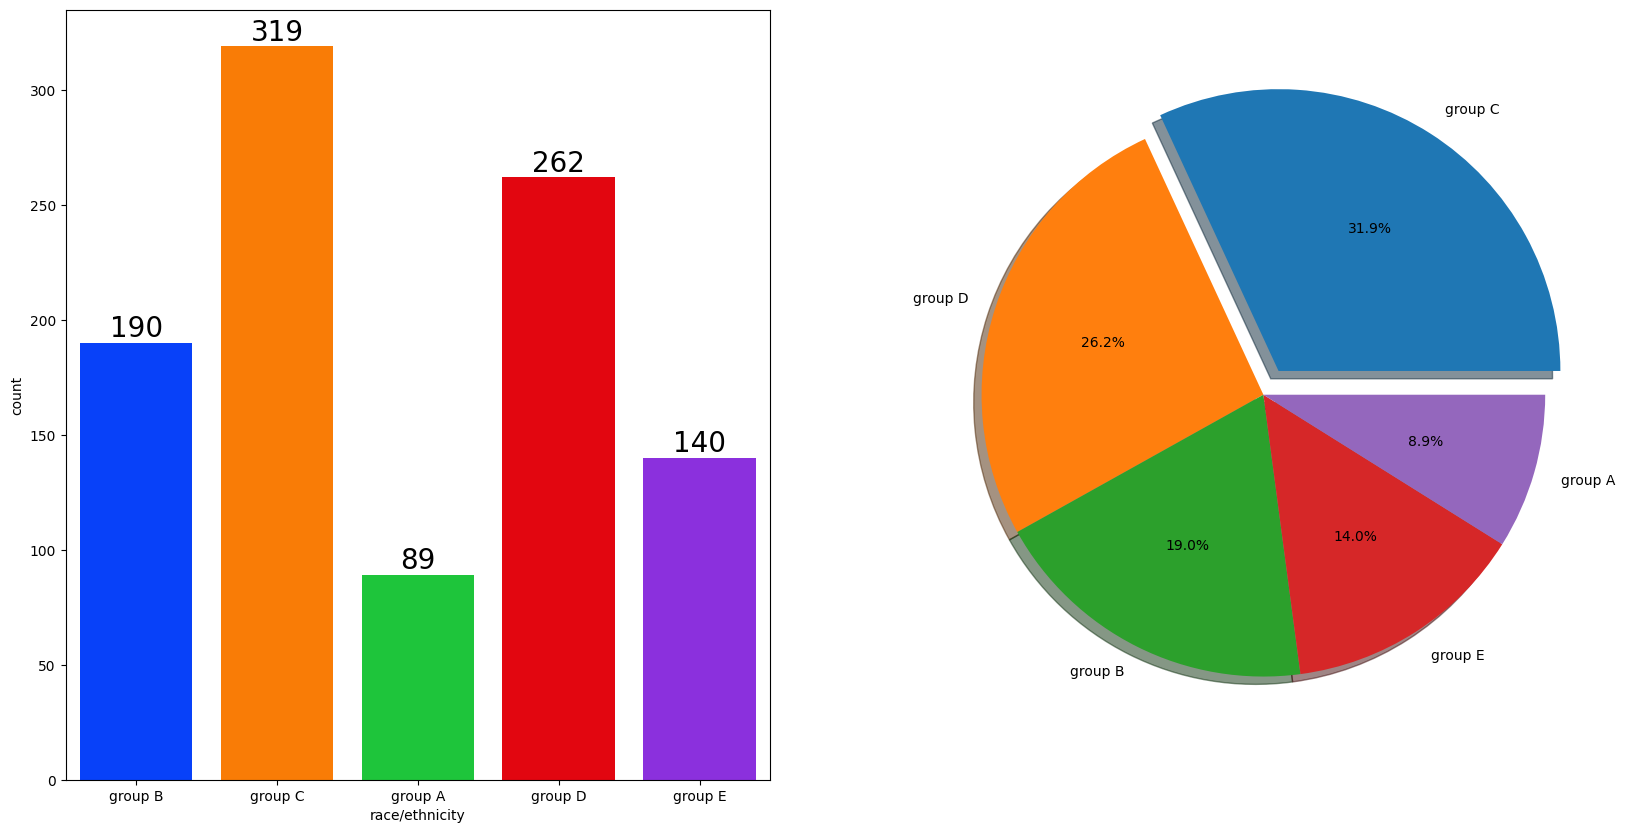

In [21]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race/ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race/ethnicity'].value_counts(),labels=df['race/ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show() 

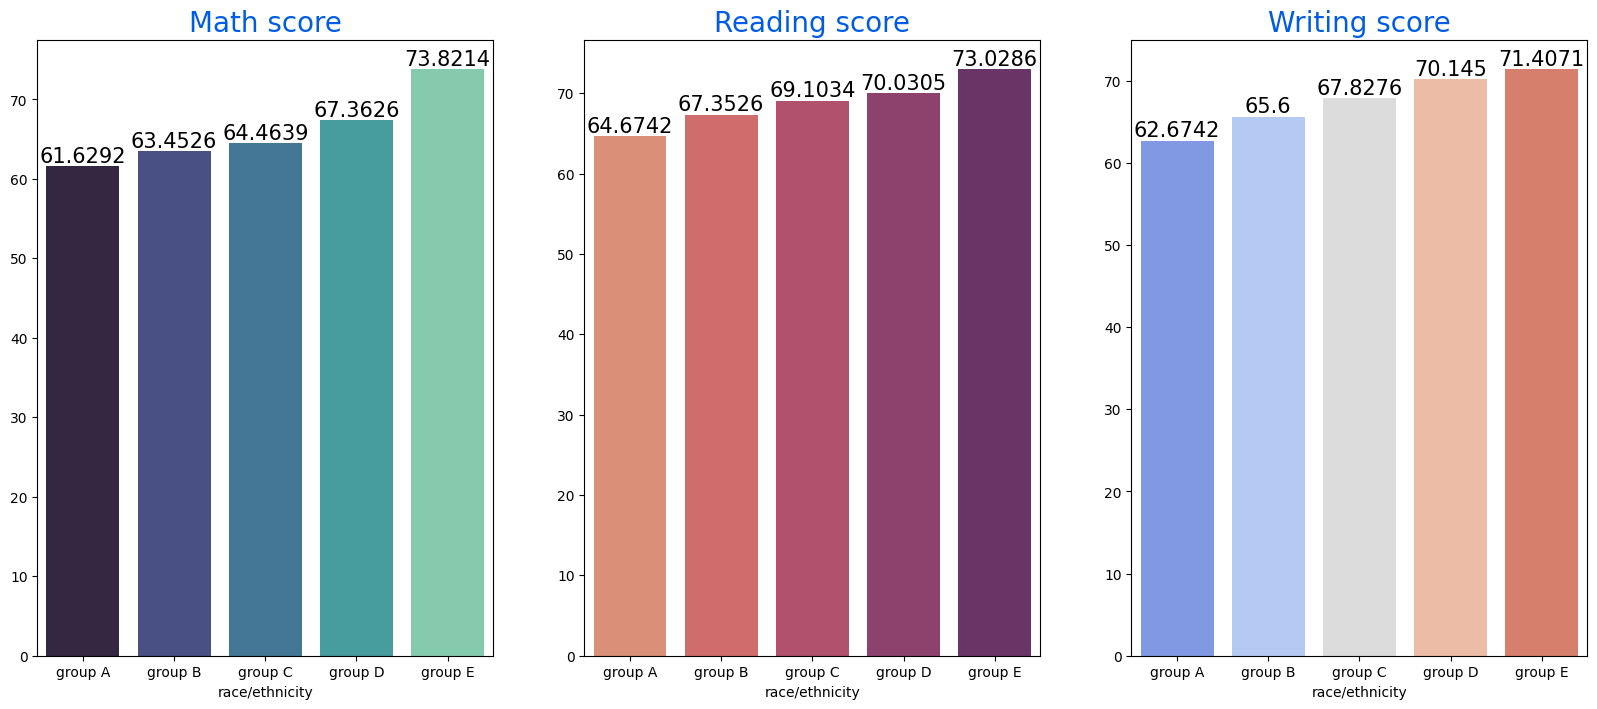

In [22]:
Group_data2=df.groupby('race/ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math score'].mean().index,y=Group_data2['math score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading score'].mean().index,y=Group_data2['reading score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing score'].mean().index,y=Group_data2['writing score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

Group E students have scored highest in all course subjects

Group A students have scored lowest in all course subjects

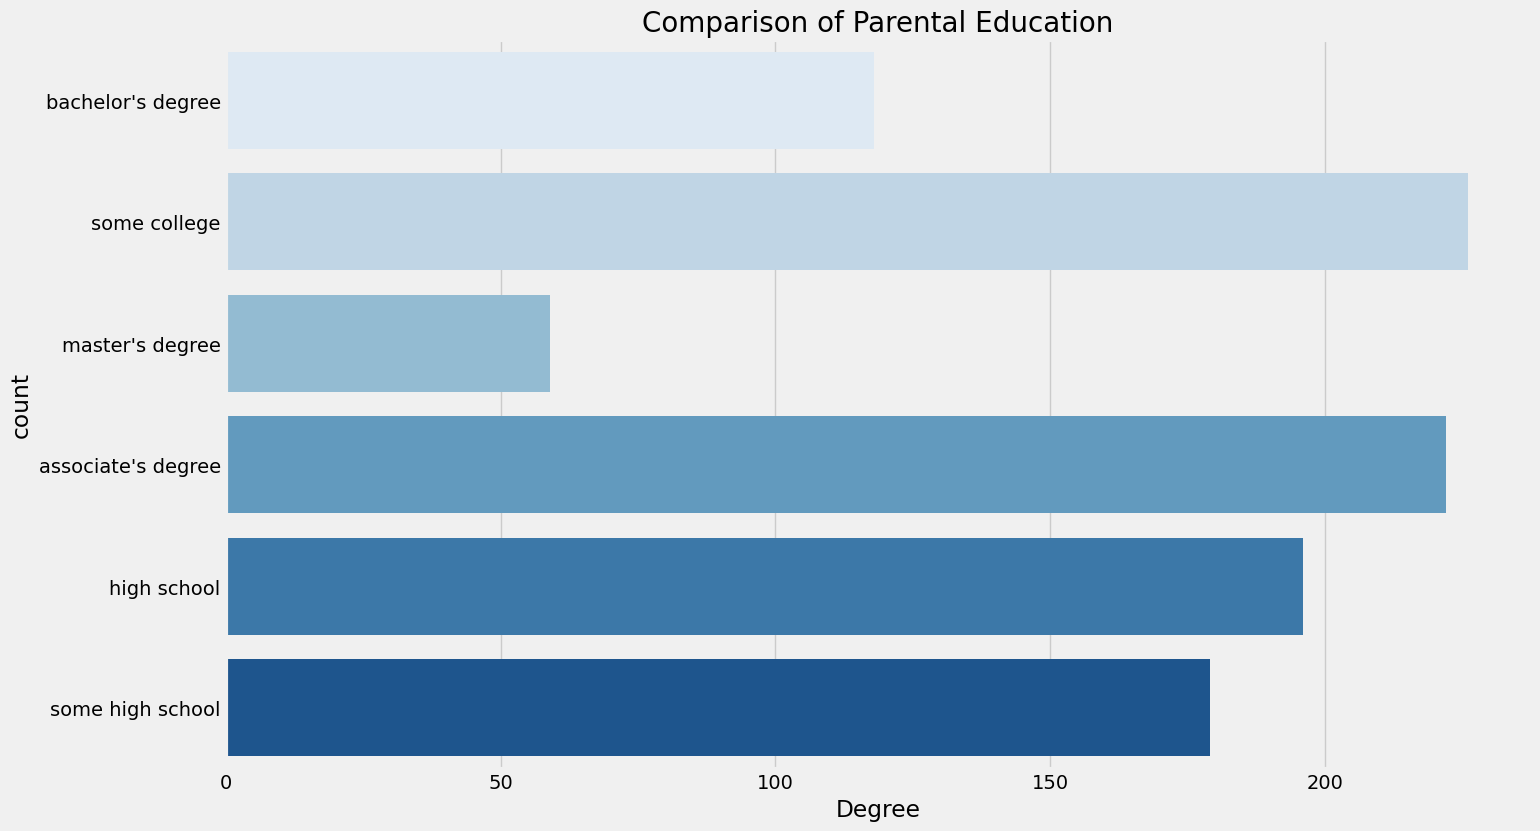

In [23]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental level of education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()